# Importing necessary libraries


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')




/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_65549/2396806111.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
Online_education= pd.read_csv('students_adaptability_level_online_education.csv')

# Data Preprocessing 

In [6]:
Online_education.isna().sum() #checking for any nan values 

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [7]:
Online_education.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [8]:
for column in Online_education.columns:
    unique_values = Online_education[column].unique()
    print(f"Unique values for {column}:", unique_values)

Unique values for Gender: ['Boy' 'Girl']
Unique values for Age: ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
Unique values for Education Level: ['University' 'College' 'School']
Unique values for Institution Type: ['Non Government' 'Government']
Unique values for IT Student: ['No' 'Yes']
Unique values for Location: ['Yes' 'No']
Unique values for Load-shedding: ['Low' 'High']
Unique values for Financial Condition: ['Mid' 'Poor' 'Rich']
Unique values for Internet Type: ['Wifi' 'Mobile Data']
Unique values for Network Type: ['4G' '3G' '2G']
Unique values for Class Duration: ['3-6' '1-3' '0']
Unique values for Self Lms: ['No' 'Yes']
Unique values for Device: ['Tab' 'Mobile' 'Computer']
Unique values for Adaptivity Level: ['Moderate' 'Low' 'High']


# Seperating Columns in Ordinal and Nominal Categories 

In [9]:
nominal_categories = {
    'Gender': ['Boy', 'Girl'],
    'Education Level': ['School', 'College', 'University'],
    'Institution Type': ['Non Government', 'Government'],
    'IT Student': ['No', 'Yes'],
    'Location': ['Yes', 'No'],
    'Financial Condition': ['Mid', 'Poor', 'Rich'],
    'Internet Type': ['Wifi', 'Mobile Data'],
    'Network Type': ['4G', '3G', '2G'],
    'Self Lms': ['No', 'Yes'],
    'Device': ['Tab', 'Mobile', 'Computer']
}


In [10]:
ordinal_categories = {
    'Age': ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30'],
    'Load-shedding': ['Low', 'High'],
    'Class Duration': ['0', '1-3', '3-6'],
    'Adaptivity Level': ['Low', 'Moderate', 'High']
}

# One Hot Encoding Categories 

In [11]:
nominal_vars = list(nominal_categories.keys())

# One-hot encode nominal variables
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(Online_education[nominal_vars]), columns=encoder.get_feature_names_out(nominal_vars))

# Concatenate the encoded columns to the original DataFrame
Online_education = pd.concat([Online_education, df_encoded], axis=1)

# Drop the original nominal columns
Online_education = Online_education.drop(nominal_vars, axis=1)

# Print the encoded DataFrame
print(Online_education)

        Age Load-shedding Class Duration Adaptivity Level  Gender_Girl  \
0     21-25           Low            3-6         Moderate          0.0   
1     21-25          High            1-3         Moderate          1.0   
2     16-20           Low            1-3         Moderate          1.0   
3     11-15           Low            1-3         Moderate          1.0   
4     16-20           Low              0              Low          1.0   
...     ...           ...            ...              ...          ...   
1200  16-20           Low            1-3              Low          1.0   
1201  16-20          High            3-6         Moderate          1.0   
1202  11-15           Low            1-3         Moderate          0.0   
1203  16-20           Low            1-3              Low          1.0   
1204  11-15           Low            1-3         Moderate          1.0   

      Education Level_School  Education Level_University  \
0                        0.0                       

# Label Encoder for Ordinal Categories 

In [12]:
label_encoder = LabelEncoder()
for var in ordinal_categories.keys():
    Online_education[var] = label_encoder.fit_transform(Online_education[var])


# Exploratory Data Analysis (EDA):


In [13]:
columns_grouped = ['Age', 'Load-shedding', 'Class Duration']
columns_grouped1 = ['Gender_Girl', 'Education Level_School', 'Education Level_University']
columns_grouped2 = ['Institution Type_Non Government', 'IT Student_Yes', 'Location_Yes']
columns_grouped3 = ['Financial Condition_Poor', 'Financial Condition_Rich', 'Internet Type_Wifi']
columns_grouped4 = ['Network Type_3G', 'Network Type_4G', 'Self Lms_Yes']
columns_grouped5 = ['Device_Mobile', 'Device_Tab']

## Correlation Heatmap:


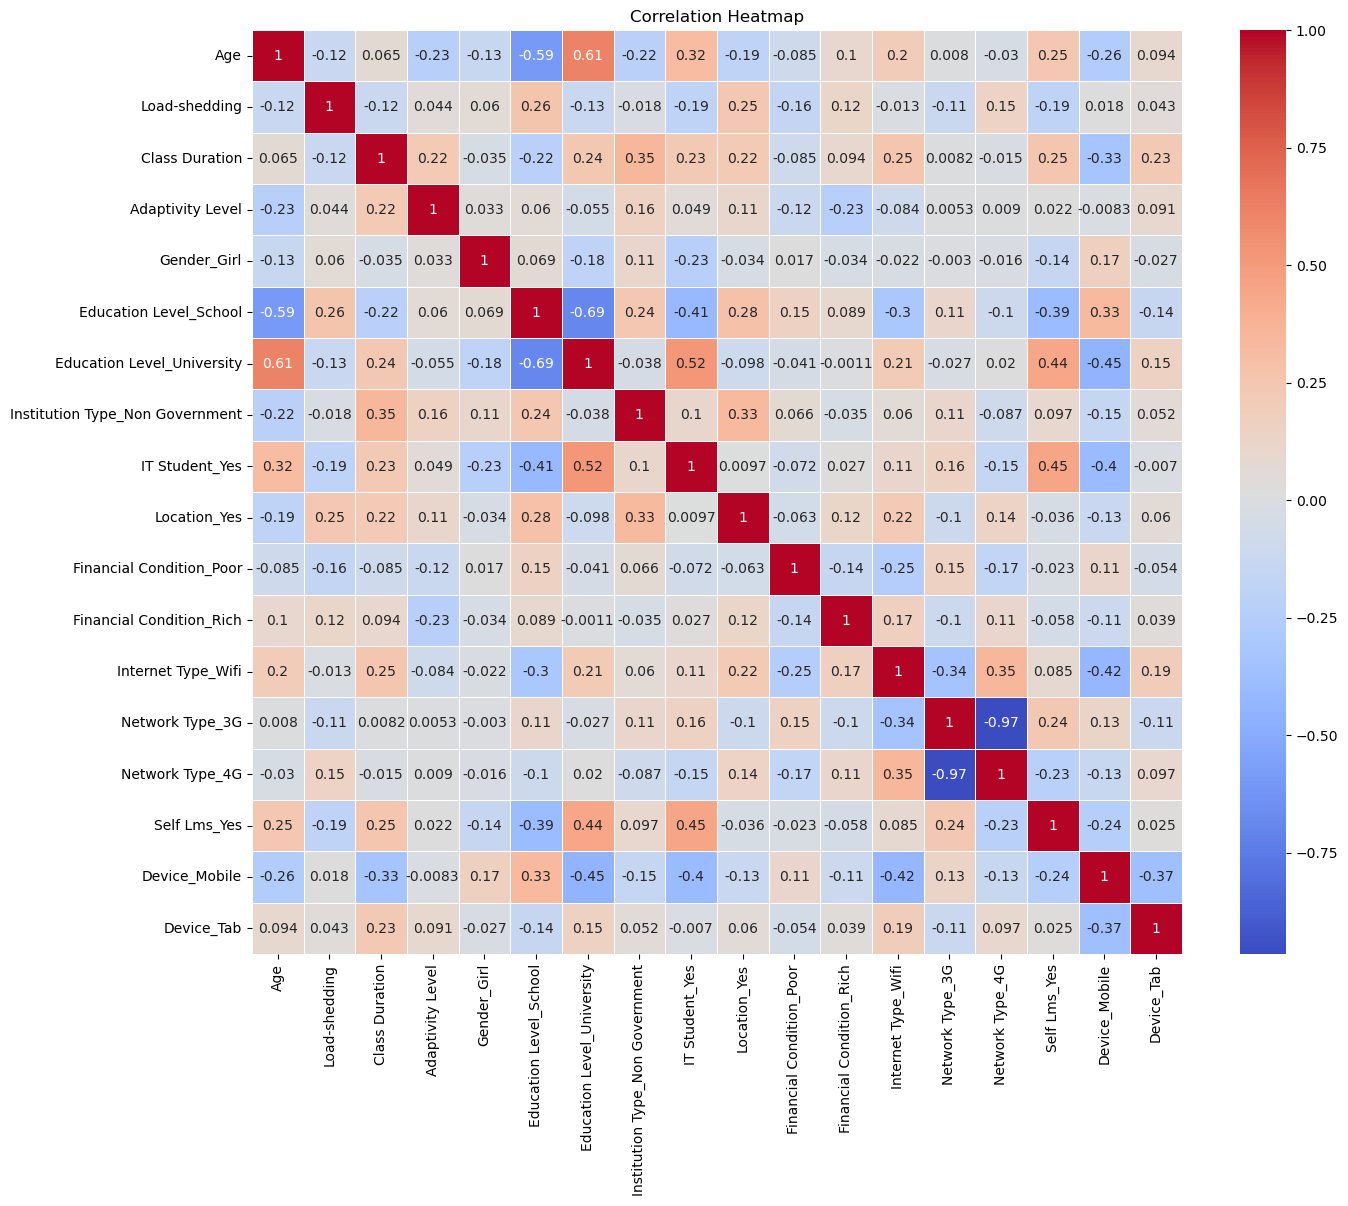

In [14]:
correlation_matrix = Online_education.corr()

plt.figure(figsize=(15, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

## Relationship Plots:


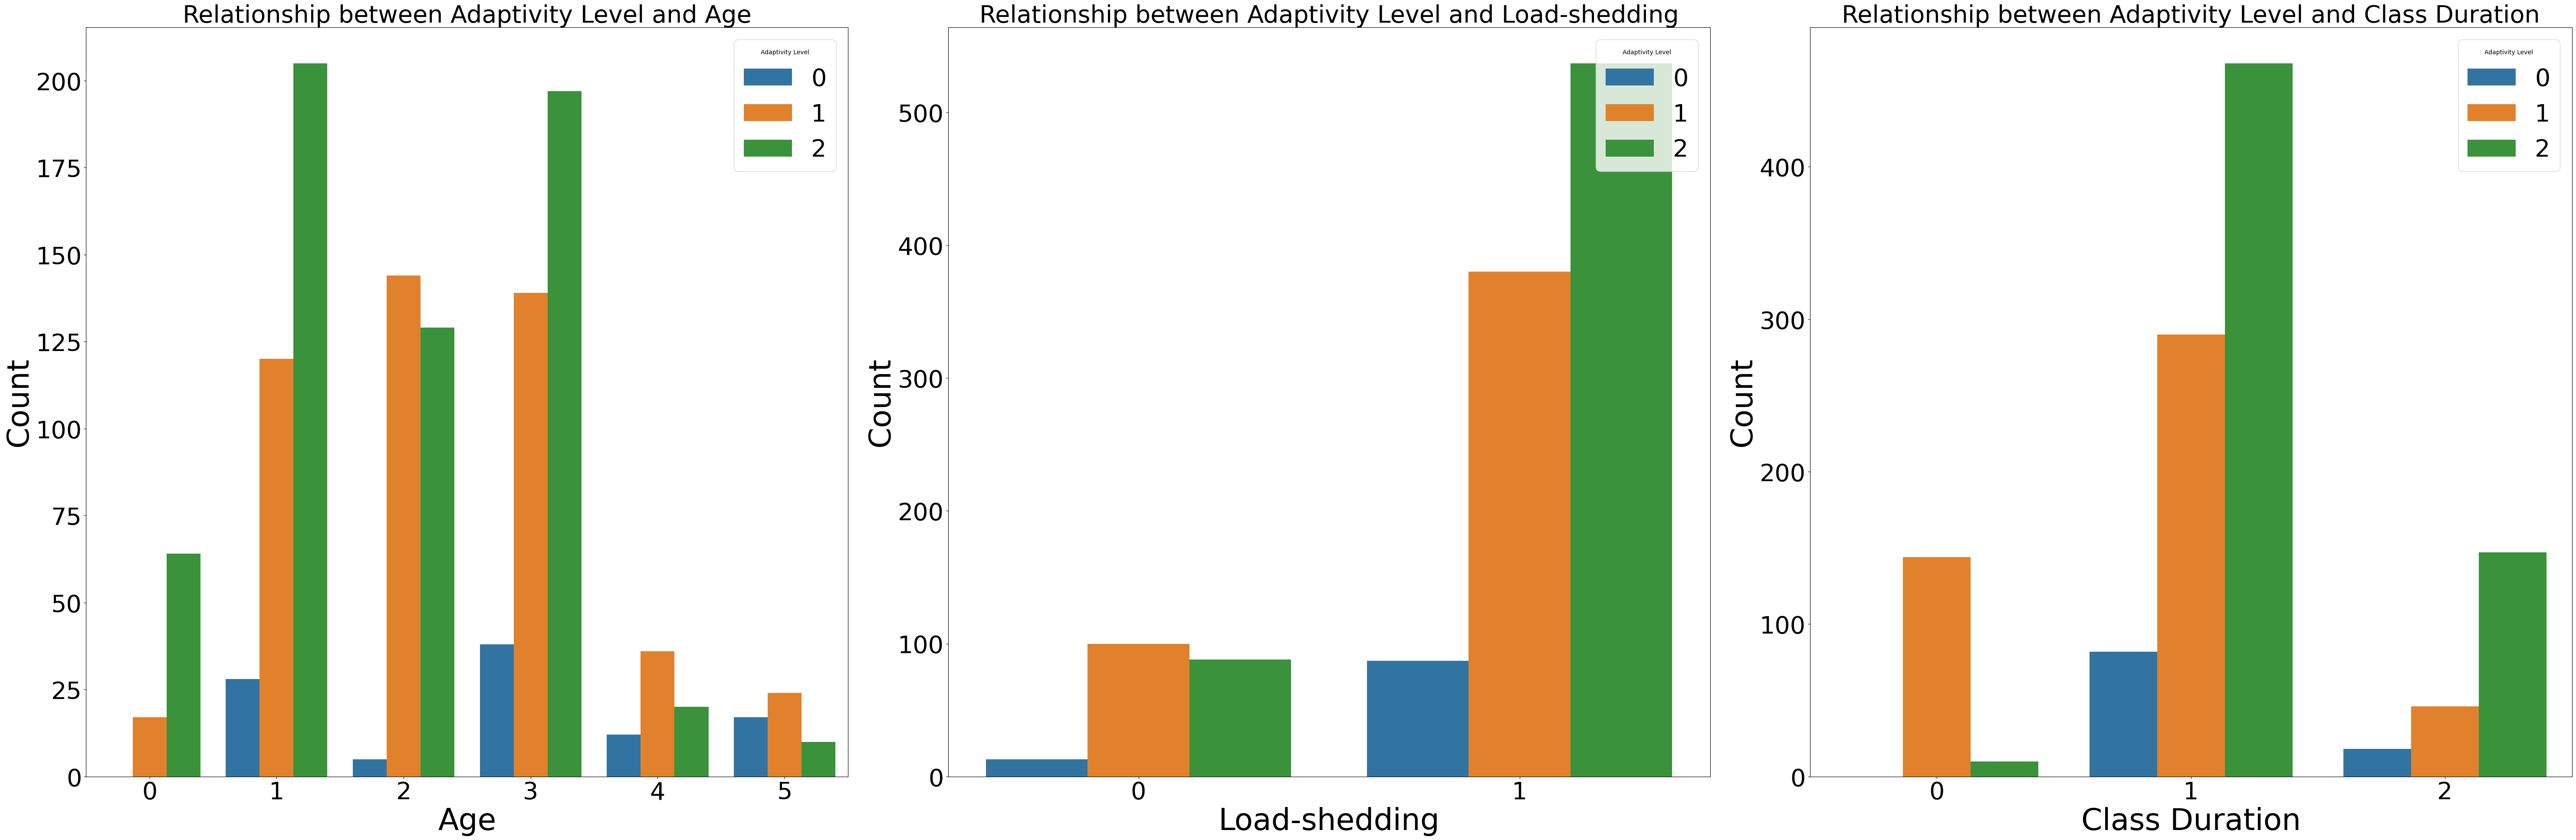

In [15]:

fig, axes = plt.subplots(ncols=len(columns_grouped), figsize=(20 * len(columns_grouped), 20))

for i, column in enumerate(columns_grouped):
    sns.countplot(x=column, hue='Adaptivity Level', data=Online_education, ax=axes[i])
    axes[i].set_title(f'Relationship between Adaptivity Level and {column}', fontsize=40)
    axes[i].set_xlabel(column, fontsize=50)
    axes[i].set_ylabel('Count', fontsize=50)

    # Increase tick label font size
    axes[i].tick_params(axis='both', labelsize=40)

    # Increase legend font size
    legend = axes[i].legend(title='Adaptivity Level', loc='upper right', prop={'size': 40})

plt.tight_layout(pad=3.0)


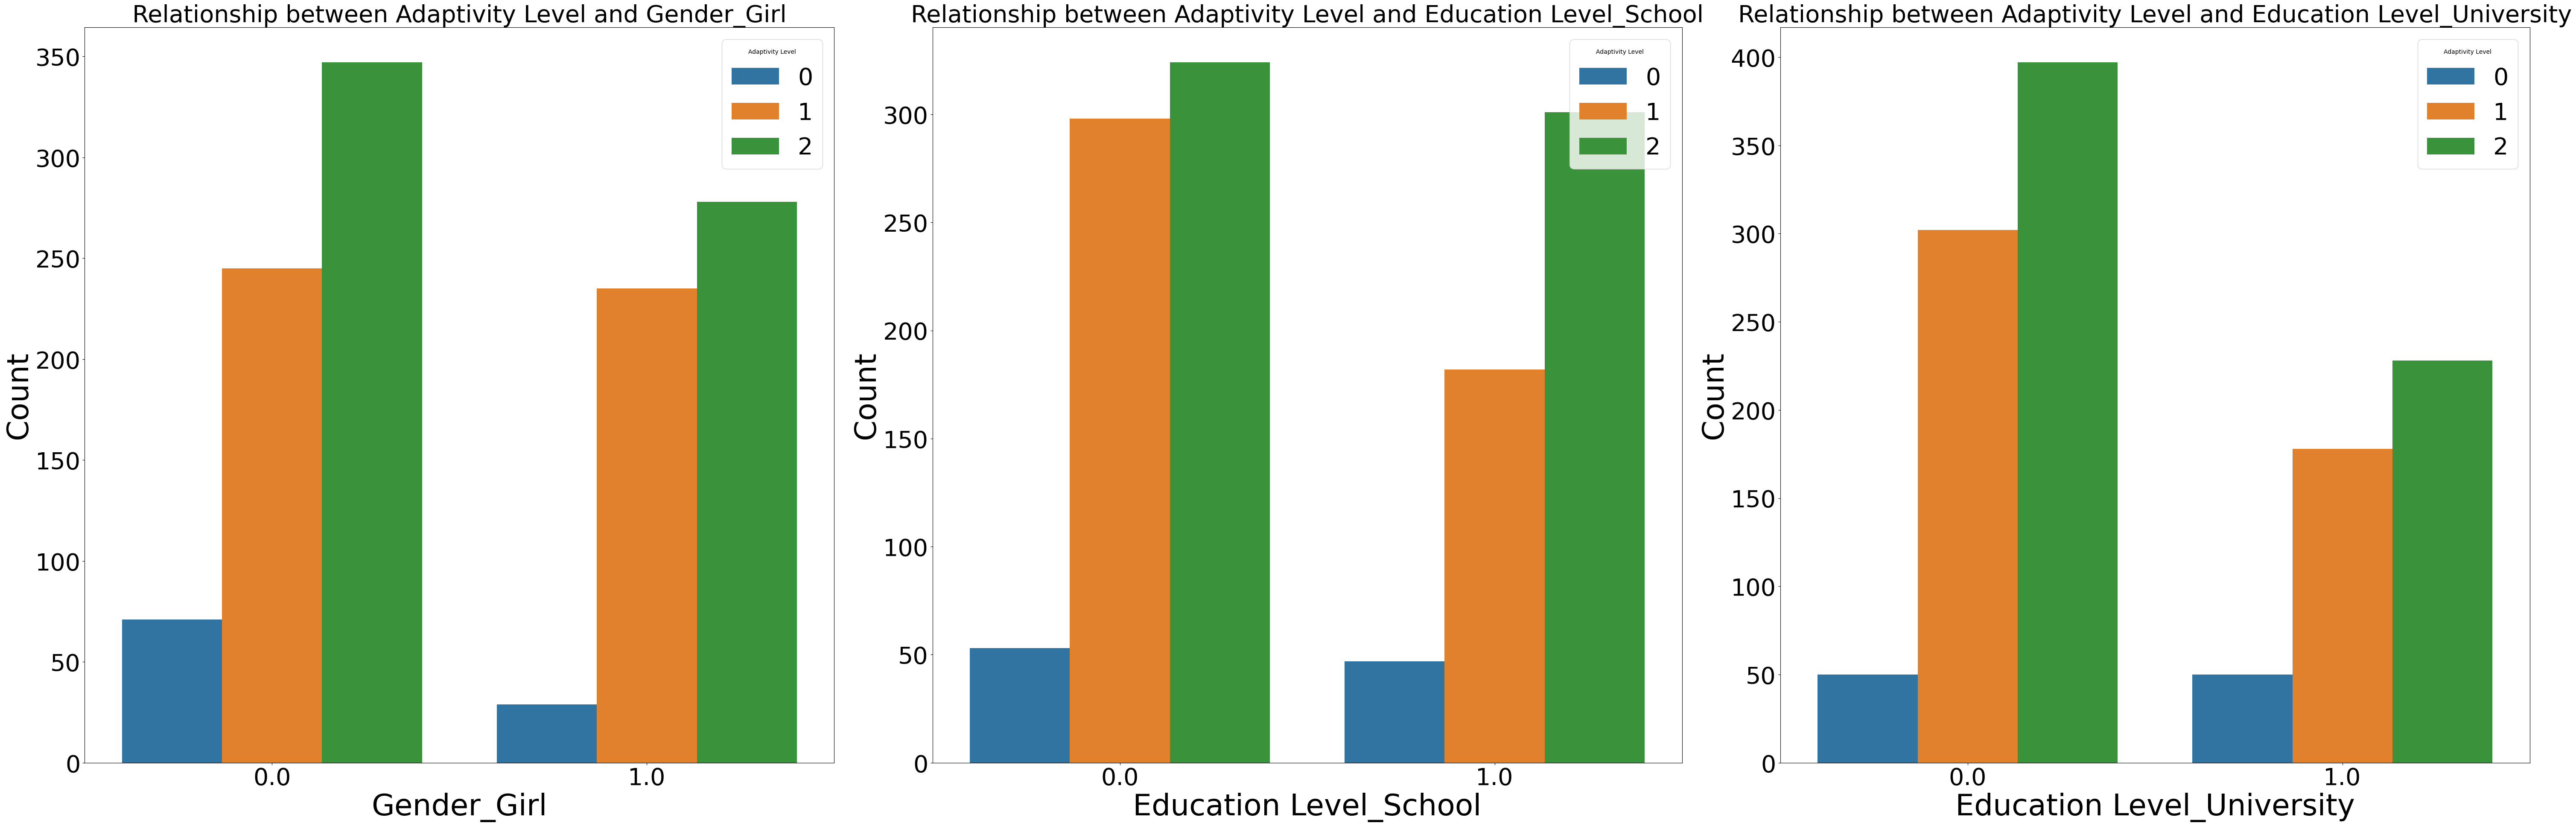

In [16]:
fig, axes = plt.subplots(ncols=len(columns_grouped1), figsize=(20 * len(columns_grouped1), 20))

for i, column in enumerate(columns_grouped1):
    sns.countplot(x=column, hue='Adaptivity Level', data=Online_education, ax=axes[i])
    axes[i].set_title(f'Relationship between Adaptivity Level and {column}', fontsize=40)
    axes[i].set_xlabel(column, fontsize=50)
    axes[i].set_ylabel('Count', fontsize=50)

    # Increase tick label font size
    axes[i].tick_params(axis='both', labelsize=40)

    # Increase legend font size
    legend = axes[i].legend(title='Adaptivity Level', loc='upper right', prop={'size': 40})

plt.tight_layout(pad=3.0)



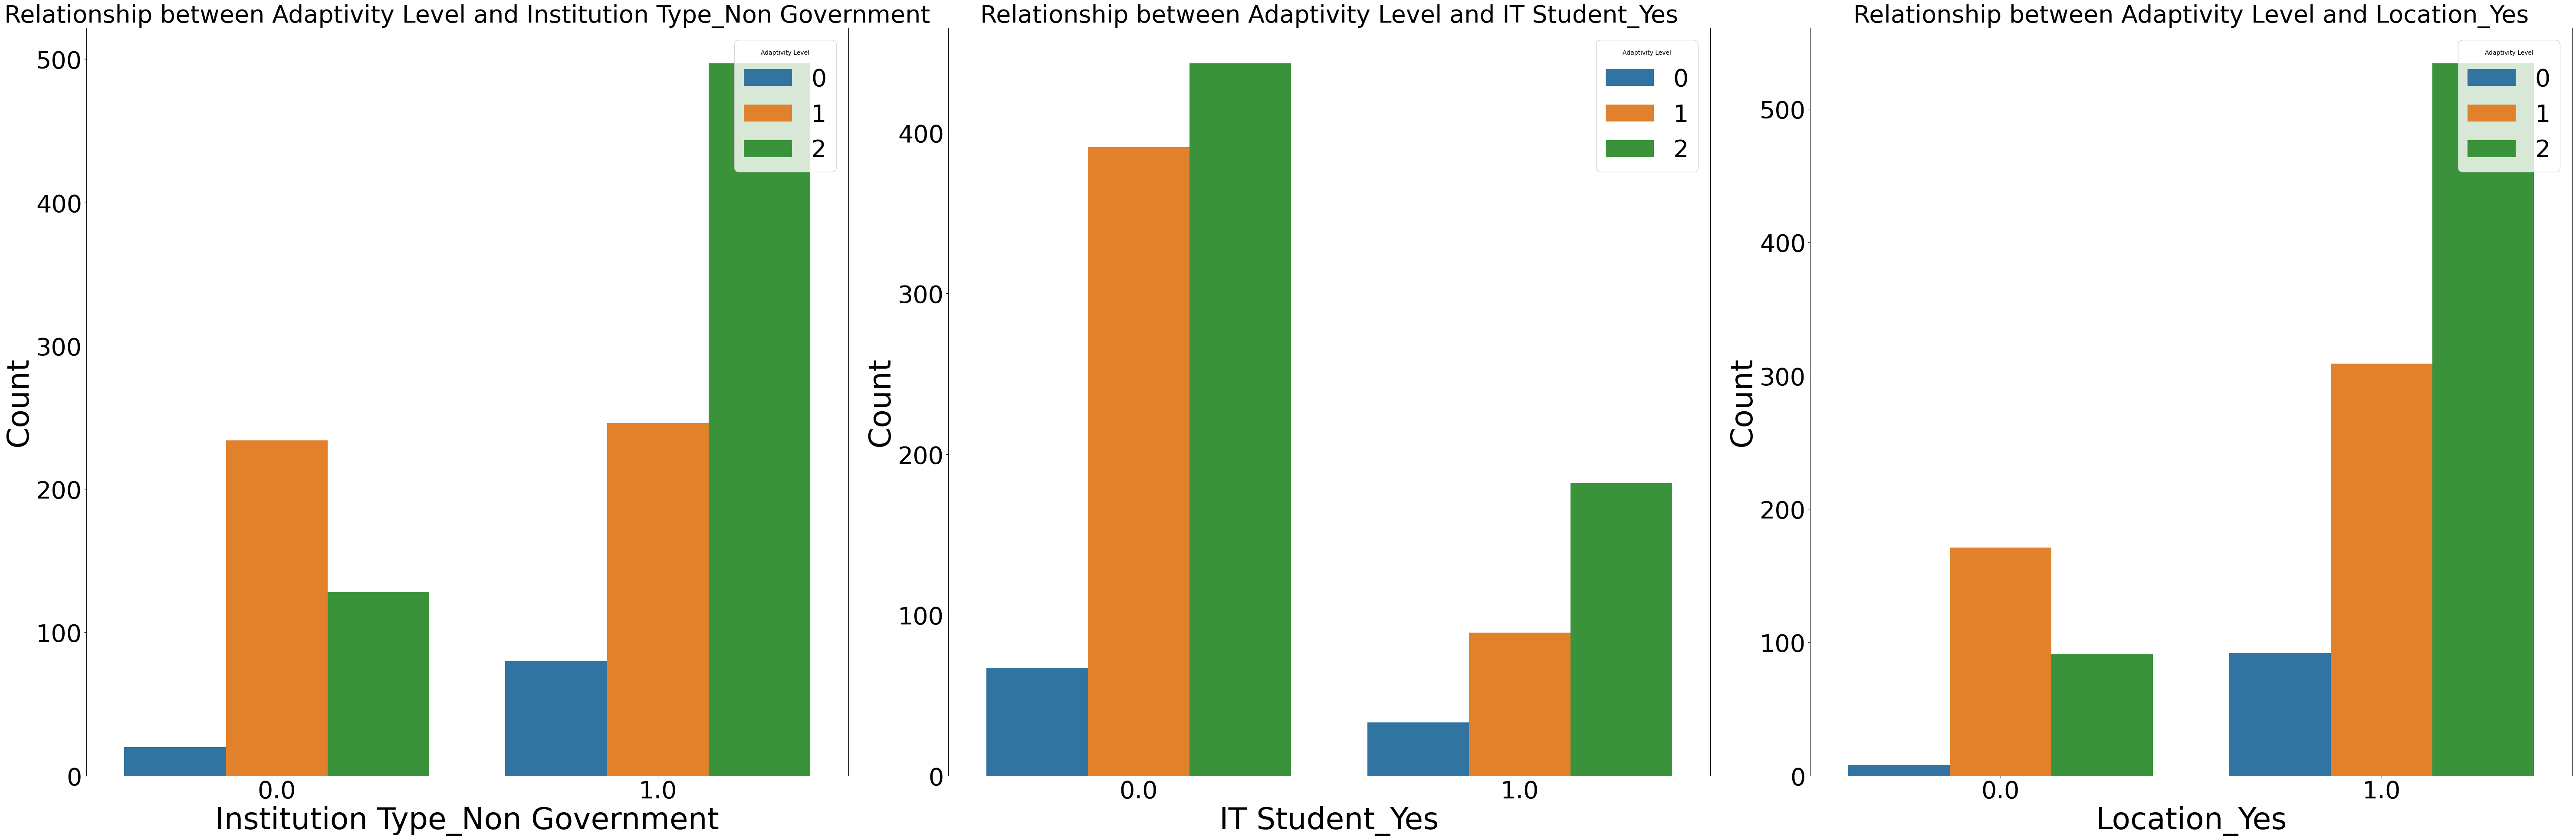

In [17]:
fig, axes = plt.subplots(ncols=len(columns_grouped2), figsize=(20 * len(columns_grouped2), 20))

for i, column in enumerate(columns_grouped2):
    sns.countplot(x=column, hue='Adaptivity Level', data=Online_education, ax=axes[i])
    axes[i].set_title(f'Relationship between Adaptivity Level and {column}', fontsize=40)
    axes[i].set_xlabel(column, fontsize=50)
    axes[i].set_ylabel('Count', fontsize=50)

    # Increase tick label font size
    axes[i].tick_params(axis='both', labelsize=40)

    # Increase legend font size
    legend = axes[i].legend(title='Adaptivity Level', loc='upper right', prop={'size': 40})

plt.tight_layout(pad=3.0)

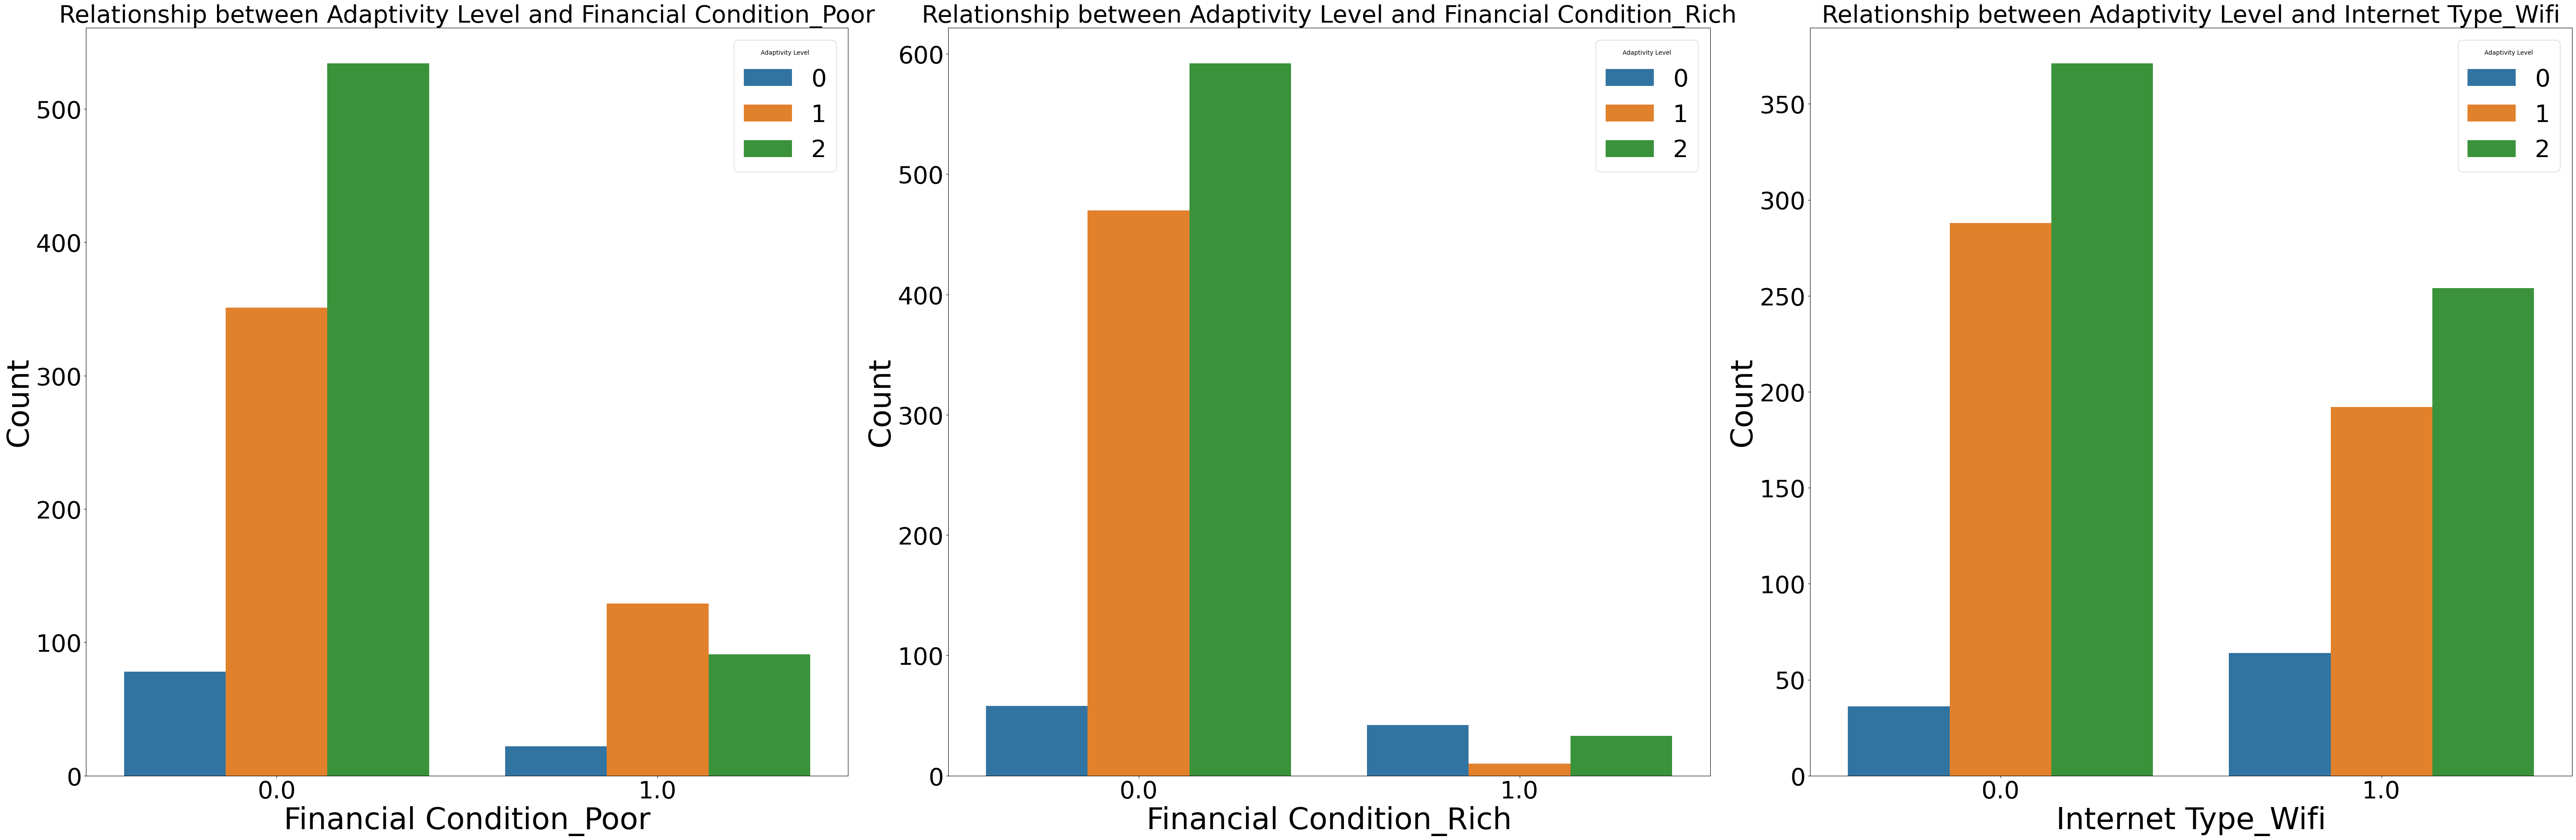

In [18]:
fig, axes = plt.subplots(ncols=len(columns_grouped3), figsize=(20 * len(columns_grouped3), 20))

for i, column in enumerate(columns_grouped3):
    sns.countplot(x=column, hue='Adaptivity Level', data=Online_education, ax=axes[i])
    axes[i].set_title(f'Relationship between Adaptivity Level and {column}', fontsize=40)
    axes[i].set_xlabel(column, fontsize=50)
    axes[i].set_ylabel('Count', fontsize=50)

    # Increase tick label font size
    axes[i].tick_params(axis='both', labelsize=40)

    # Increase legend font size
    legend = axes[i].legend(title='Adaptivity Level', loc='upper right', prop={'size': 40})

plt.tight_layout(pad=3.0)

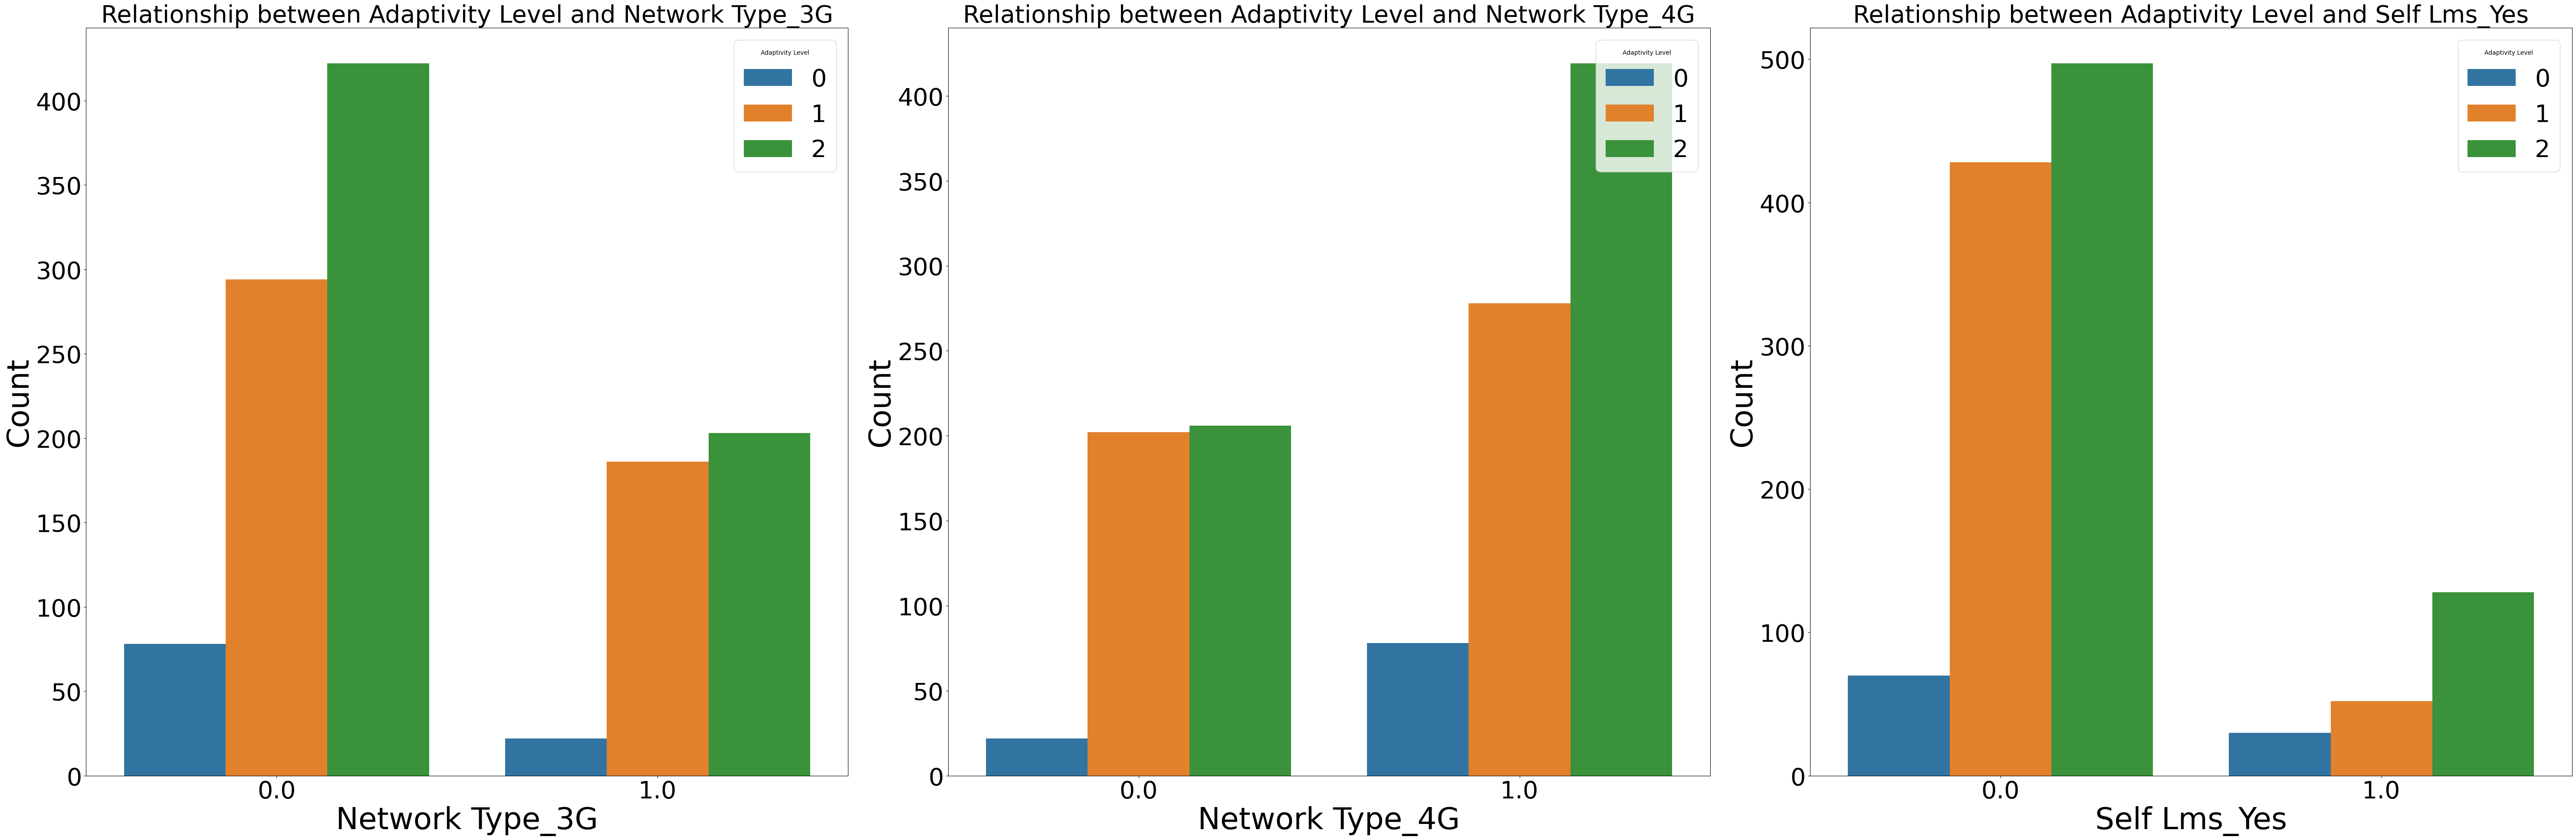

In [19]:
fig, axes = plt.subplots(ncols=len(columns_grouped4), figsize=(20 * len(columns_grouped4), 20))

for i, column in enumerate(columns_grouped4):
    sns.countplot(x=column, hue='Adaptivity Level', data=Online_education, ax=axes[i])
    axes[i].set_title(f'Relationship between Adaptivity Level and {column}', fontsize=40)
    axes[i].set_xlabel(column, fontsize=50)
    axes[i].set_ylabel('Count', fontsize=50)

    # Increase tick label font size
    axes[i].tick_params(axis='both', labelsize=40)

    # Increase legend font size
    legend = axes[i].legend(title='Adaptivity Level', loc='upper right', prop={'size': 40})

plt.tight_layout(pad=3.0)

# Data Splitting

In [20]:
X = Online_education.drop(columns='Adaptivity Level')

y = Online_education['Adaptivity Level']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (964, 17)
X_test shape: (241, 17)
y_train shape: (964,)
y_test shape: (241,)


In [23]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [24]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (964, 17)
X_test shape: (241, 17)
y_train shape: (964, 1)
y_test shape: (241, 1)


# Creating Pipelines

## Pipe Line 1 (Logistic Regression)

In [25]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),        
    ('classifier', LogisticRegression())  
])


pipeline.fit(X_train, y_train)


predictions = pipeline.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
accuracy

0.7136929460580913

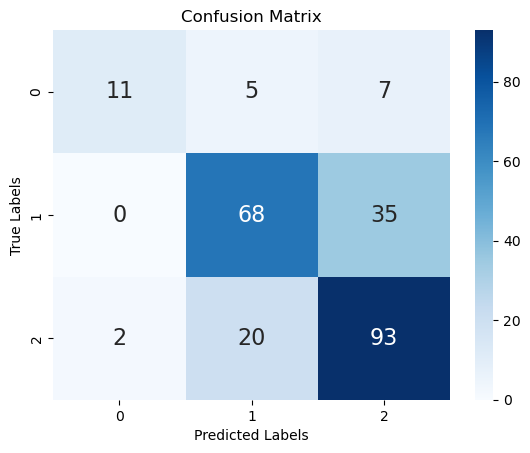

Accuracy: 0.7136929460580913


In [26]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

## Pipeline 2 (Random Forest Classifier, MinMaxScalar, and Gridsearch CV)

In [27]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),               
    ('classifier', RandomForestClassifier())    
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)





/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/justinlapidus/anaconda3/envs/justin-land/lib/

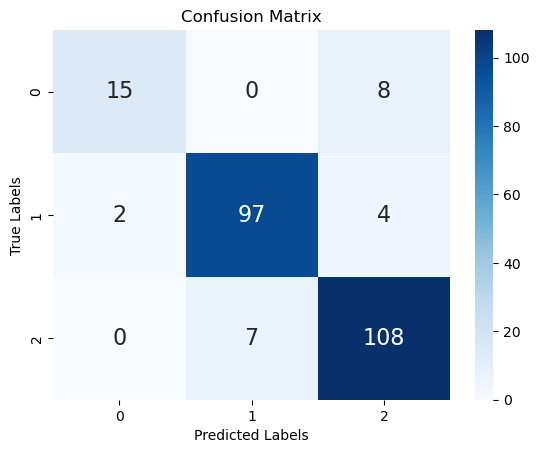

Accuracy: 0.9128630705394191


In [28]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

## Pipeline 3 (XGB Classifier, MinMax Scalar, Gridsearch CV)

In [29]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),               
    ('classifier', XGBClassifier())          
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Best Hyperparameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 200}
Accuracy: 0.9128630705394191


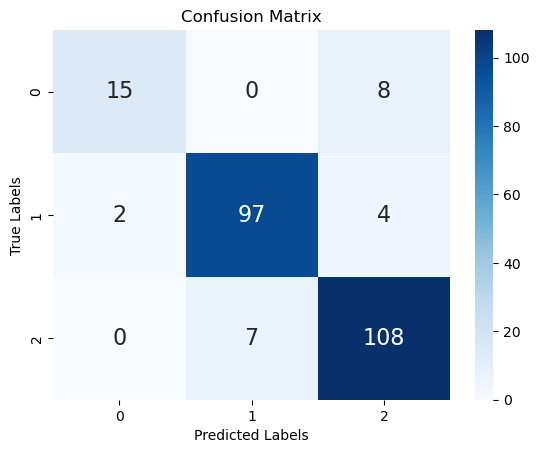

Accuracy: 0.9128630705394191


In [30]:
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

## Pipeline 4 (SVC, GridSearch)

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

pipeline_svm = Pipeline([
    ('scaler', MinMaxScaler()),  
    ('classifier', SVC())           
])

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

best_model_svm = grid_search_svm.best_estimator_
predictions_svm = best_model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, predictions_svm)


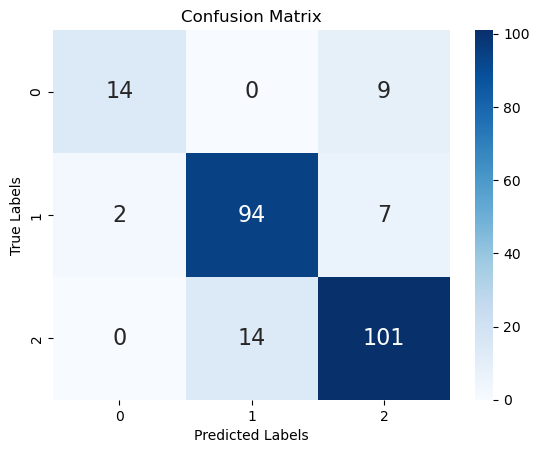

Accuracy: 0.8672199170124482


In [32]:
cm = confusion_matrix(y_test, predictions_svm)

# Display the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, predictions_svm)
print(f'Accuracy: {accuracy_svm}')

## Piepline 5 (Decision Tree Classifier, Min Max Scalar, GridSearchCV)

In [33]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),             
    ('classifier', DecisionTreeClassifier()) 
])

param_grid = {
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

best_model = grid_search.best_estimator_
predictions2 = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions2)
print(f'Accuracy: {accuracy}')

Best Hyperparameters: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Accuracy: 0.9004149377593361


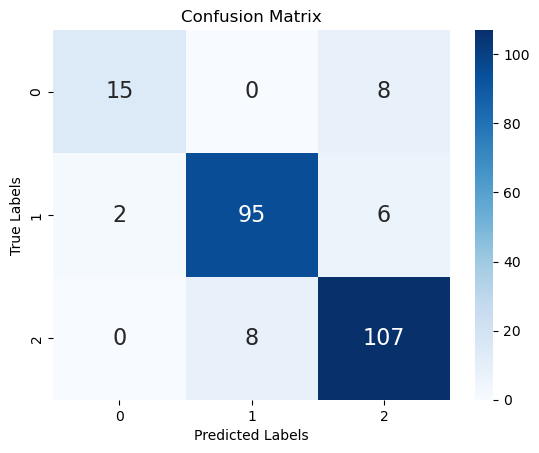

Accuracy: 0.9004149377593361


In [34]:
cm = confusion_matrix(y_test, predictions2)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, predictions2)
print(f'Accuracy: {accuracy}')

In [35]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),   # Step 1: MinMaxScaler for preprocessing (optional)
    ('classifier', GaussianNB())  # Step 2: Gaussian Naive Bayes as the model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
predictions = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6224066390041494


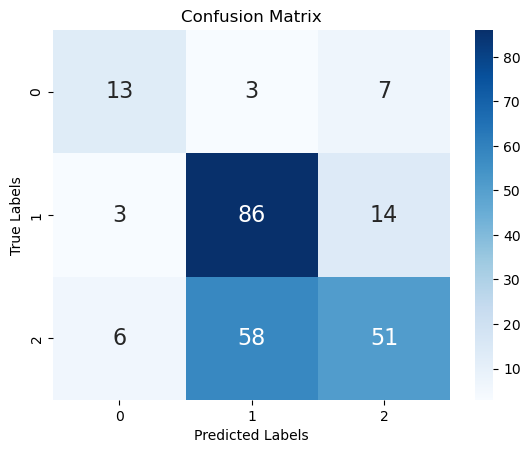

Accuracy: 0.6224066390041494


In [36]:
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


## Model Evaluation Summary:

### Logistic Regression Pipeline:
#### Accuracy: 71.37%

### Random Forest Classifier Pipeline:
#### Accuracy: 89.21%
#### Best Hyperparameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}

### XGB Classifier Pipeline:
#### Accuracy: 91.29%
#### Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 200}

### SVM Pipeline:
#### Accuracy: 86.72%
#### Best Hyperparameters: {'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}

### Decision Tree Classifier Pipeline:
#### Accuracy: 90.87%
#### Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}

### Gaussian Naive Bayes Pipeline:
#### Accuracy: 62.24%

## Overall Conclusion:
#### Among the models tested, the XGB Classifier pipeline achieved the highest accuracy at 91.29%, closely followed by the Random Forest Classifier with an accuracy of 89.21%. The choice of the best model depends on various factors, including the specific requirements of the problem, interpretability, and computational resources. It's essential to consider other metrics, such as precision, recall, and F1-score, to get a more comprehensive understanding of the model's performance, especially in imbalanced datasets. 